In [1]:
import requests
from google.transit import gtfs_realtime_pb2
from datetime import datetime

# API kulcsod ide
API_KEY = "55bc10e5-ce8e-4a18-ba6f-fdee71636724"
URL = f"https://go.bkk.hu/api/query/v1/ws/gtfs-rt/full/VehiclePositions.pb?key={API_KEY}"

response = requests.get(URL)
response.raise_for_status()

now = datetime.now()
timestamp_str = now.strftime("%Y%m%d_%H%M%S")
filename = f"feed_{timestamp_str}.pb"

with open(f"dynamic_gtfs/{filename}", "wb") as f:
    f.write(response.content)

In [2]:
feed = gtfs_realtime_pb2.FeedMessage()
with open(f"dynamic_gtfs/{filename}", "rb") as f:
    feed.ParseFromString(f.read())

In [3]:
timestamp = feed.header.timestamp
print(timestamp)

1760469624


In [4]:
vehicles = feed.entity
len(vehicles)

1157

In [ ]:
vehicles[0]

id: "VehiclePosition-BKK_1002"
vehicle {
  trip {
    route_id: "2170"
  }
  vehicle {
    id: "1002"
    label: "-"
    license_plate: "BPO221"
  }
  position {
    latitude: 47.4283791
    longitude: 19.1567059
    bearing: 202
    speed: 0
  }
  current_status: IN_TRANSIT_TO
  timestamp: 1760469618
}

In [32]:
trip_ids = [vehicle.vehicle.trip.trip_id for vehicle in vehicles if vehicle.vehicle.trip.route_id == "0050"]
trip_ids

['D01668404',
 'D01668396',
 'D01668399',
 'D01668413',
 '',
 'D01668391',
 'D01668415',
 'D01668364',
 'D01668376',
 'D01668423',
 '',
 '',
 '',
 'D01668369',
 '',
 'D01668388',
 'D01668419',
 'D01668409',
 '',
 '1760468047770',
 'D01668372']

### Plot 5ös busz

In [18]:
import partridge as ptg

gtfs_path = "budapest_gtfs.zip"
feed = ptg.load_feed(gtfs_path, view=None) 

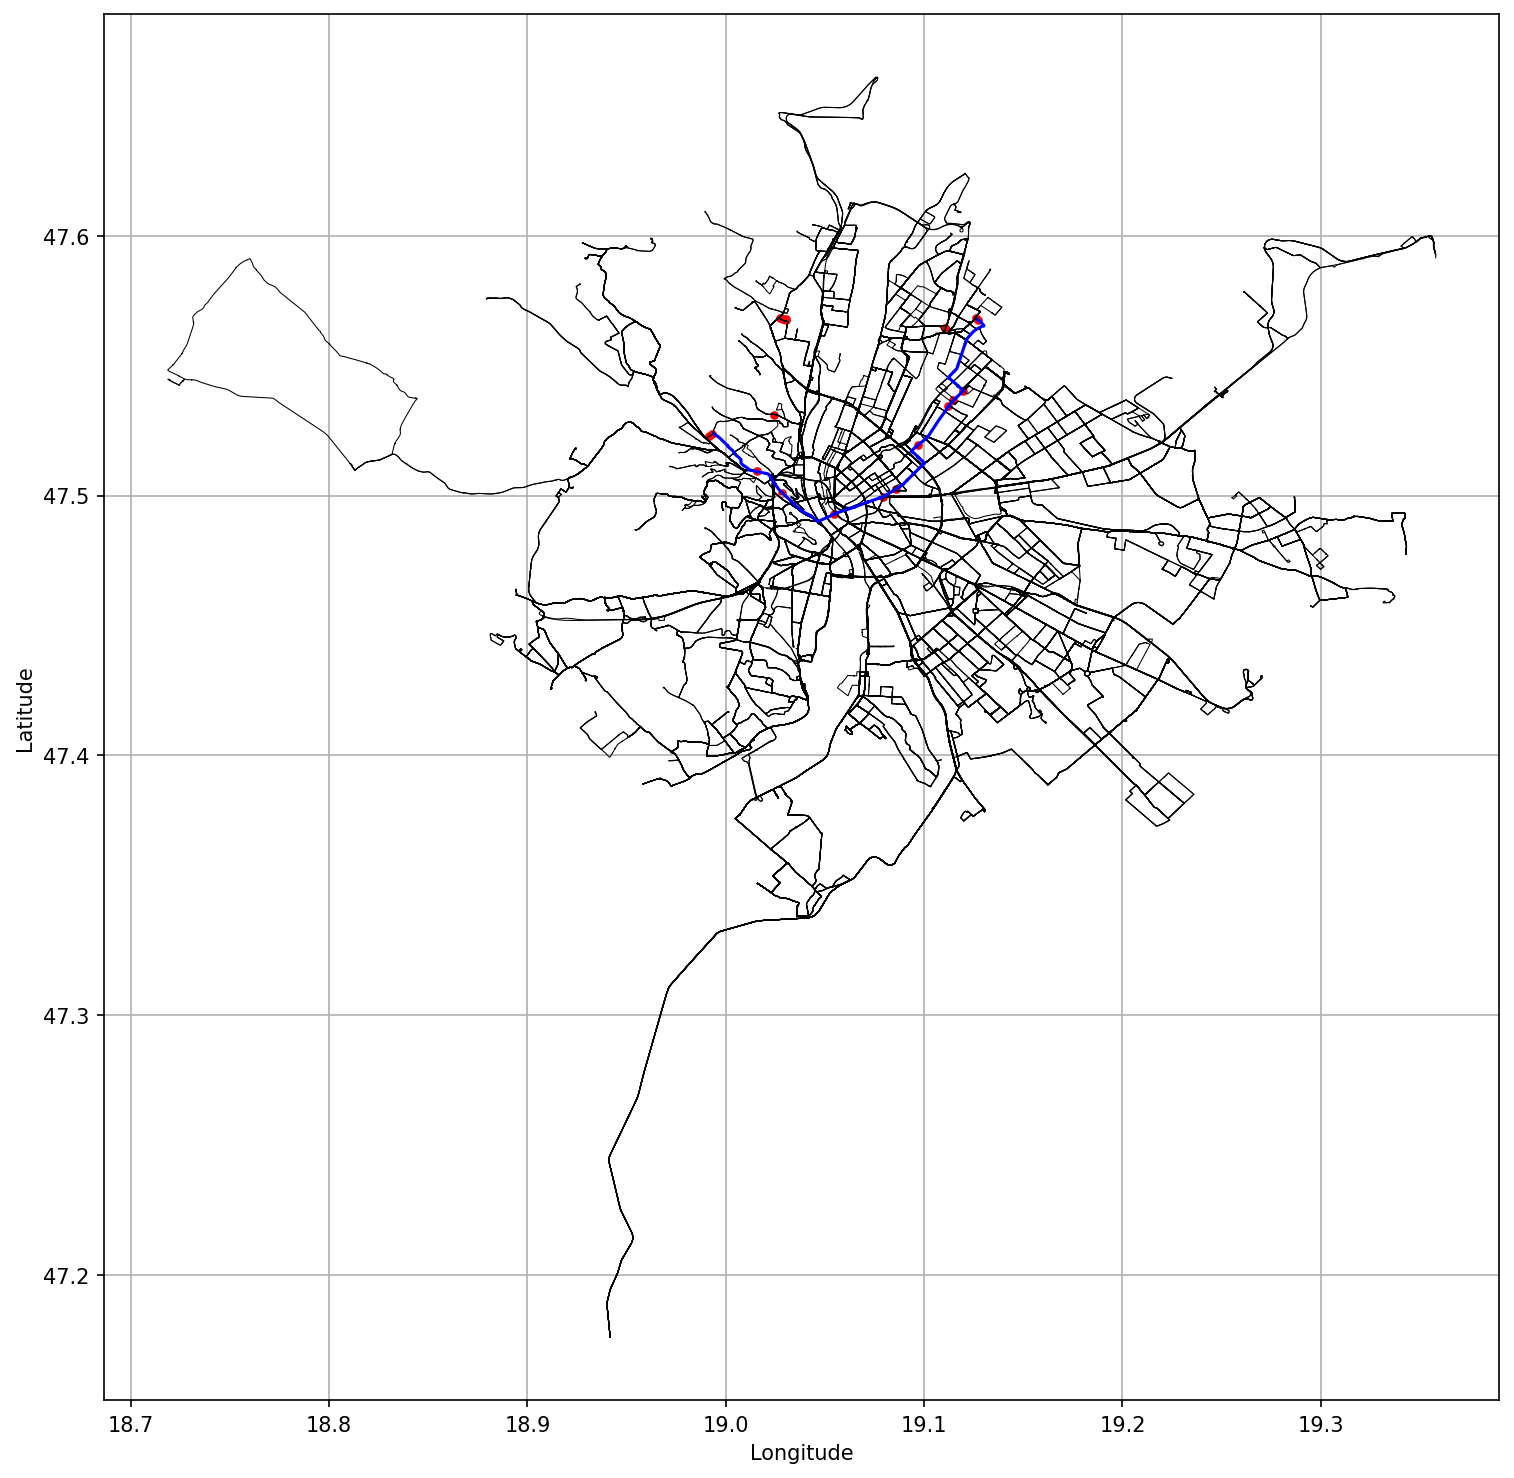

In [39]:
import matplotlib.pyplot as plt

def plot_stops(stops,ax):
    ax.scatter(stops.stop_lon, stops.stop_lat, s=5, c='red', alpha=0.7)

def plot_shapes(shapes,ax,c='black',alpha=1,lw=0.5):
    for shap_id, group in shapes.groupby("shape_id"):
        group = group.sort_values("shape_pt_sequence")
        ax.plot(group["shape_pt_lon"], group["shape_pt_lat"], linewidth=lw,c=c,alpha=alpha)

def plot_shape(shapes, trips, trip_id, ax, c='blue'):

    # Get the shape_id for this trip
    shape_id = trips.loc[trips['trip_id'] == trip_id, 'shape_id'].iloc[0]

    # Filter points for this shape
    shape_points = shapes[shapes['shape_id'] == shape_id].sort_values('shape_pt_sequence')

    # Plot
    ax.plot(shape_points['shape_pt_lon'], shape_points['shape_pt_lat'], c=c)
    


fig, ax = plt.subplots(1,figsize=(12,12),dpi=150)

# plot_stops(feed.stops, ax)
plot_shapes(feed.shapes, ax)
plot_shape(feed.shapes, feed.trips, trip_id=trip_ids[-1] , ax=ax)

for vehicle in vehicles:
    if vehicle.vehicle.trip.route_id == "0050":
        position = vehicle.vehicle.position
        plt.scatter(position.longitude, position.latitude,color='red',marker='o',s=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

Azok a buszok is látszódnak, amik a garázsban vannak. Ezért kell csekkolni, hogy a feed.vehicle.vehicle.trip-nek van-e trip_id tulajdonsága!!!